In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Задача 1

1. Сгенерируйте список из 1000 случайных чисел в диапазоне от 1 до 6, имитируя броски игральной кости.
2. Используйте plt.hist для визуализации распределения чисел.
3. Настройте параметры bins, rwidth, и density, чтобы гистограмма корректно отображала равномерное распределение.
4. Добавьте подписи к осям и заголовок гистограммы.

[1 2 1 2 1 3 2 3 5 6]


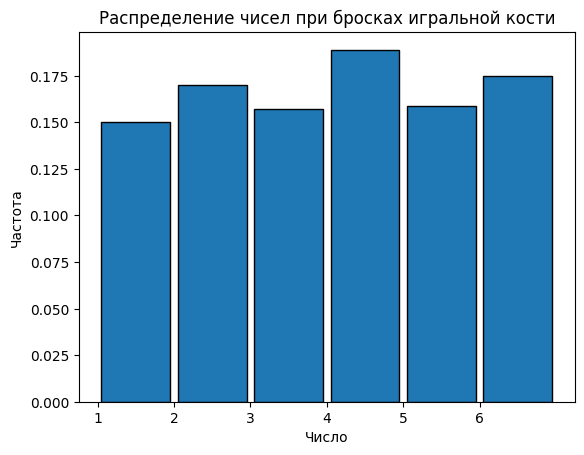

In [24]:
dice_rolls = np.random.randint(1, 7, size=1000)
print(dice_rolls[:10])

plt.hist(dice_rolls, bins=np.arange(1, 8), edgecolor='black', rwidth=0.9, density=True)
plt.title('Распределение чисел при бросках игральной кости')
plt.xlabel('Число')
plt.ylabel('Частота')
plt.xticks(np.arange(1, 7))
plt.show()

## Задача 2

Исследовать, как выбросы влияют на характеристики нормального распределения (среднее значение и стандартное отклонение), и визуализировать эффект выбросов на гистограмме распределения.
1. Используйте np.random.seed() для установки начального значения генератора случайных чисел для воспроизводимости результатов.
2. Сгенерируйте выборку из 10000 значений, следующих нормальному распределению с заданным средним (например, 50) и стандартным отклонением (например, 15), используя np.random.normal().
3. Добавьте к этой выборке несколько выбросов — значений, сильно отличающихся от остальных (например, 10 значений в районе 200).
4. Рассчитайте новые среднее значение и стандартное отклонение для модифицированной выборки.
5. Визуализируйте модифицированное распределение с помощью plt.hist(), отметьте новое среднее значение и стандартные отклонения, как в предыдущем примере.
6. Сравните графики и числовые характеристики исходного и модифицированного распределений, чтобы обсудить влияние выбросов на распределение.

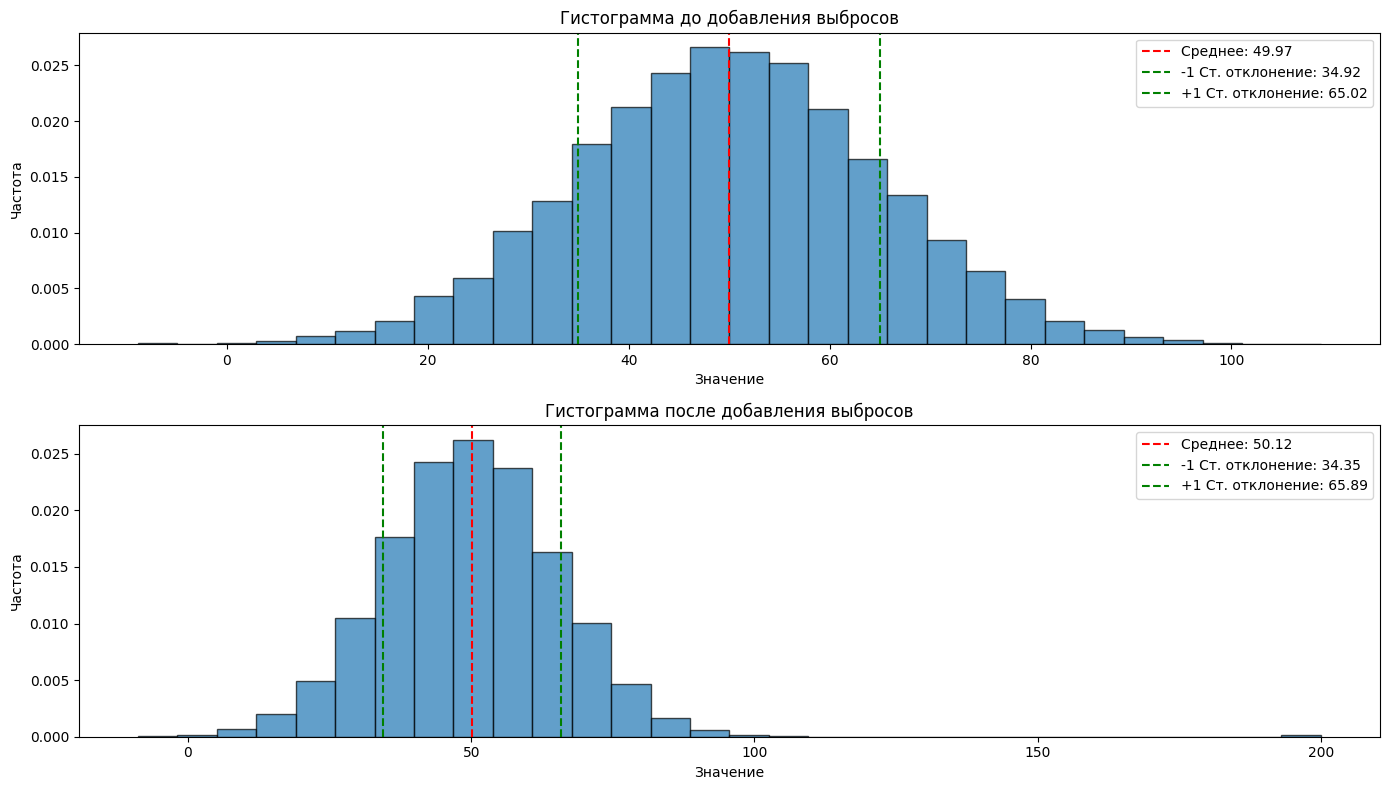

До добавления выбросов:
Среднее значение: 50.00;
Стандартное отклонение: 15.00

После добавления выбросов:
Среднее значение: 50.12;
Стандартное отклонение: 15.77


In [45]:
np.random.seed(42)

mean = 50
std_dev = 15
sample_size = 10000
data = np.random.normal(loc=mean, scale=std_dev, size=sample_size)

outliers = np.full(10, 200)
data_with_outliers = np.concatenate([data, outliers])

mean_after = np.mean(data_with_outliers)
std_after = np.std(data_with_outliers)

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.hist(data, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.axvline(mean_before, color='red', linestyle='--', label=f'Среднее: {mean_before:.2f}')
plt.axvline(mean_before - std_before, color='green', linestyle='dashed', label=f'-1 Ст. отклонение: {mean_before - std_before:.2f}')
plt.axvline(mean_before + std_before, color='green', linestyle='dashed', label=f'+1 Ст. отклонение: {mean_before + std_before:.2f}')
plt.title('Гистограмма до добавления выбросов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()

plt.subplot(2, 1, 2)
plt.hist(data_with_outliers, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.axvline(mean_after, color='red', linestyle='--', label=f'Среднее: {mean_after:.2f}')
plt.axvline(mean_after - std_after, color='green', linestyle='--', label=f'-1 Ст. отклонение: {mean_after - std_after:.2f}')
plt.axvline(mean_after + std_after, color='green', linestyle='--', label=f'+1 Ст. отклонение: {mean_after + std_after:.2f}')
plt.title('Гистограмма после добавления выбросов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

print(f'До добавления выбросов:\nСреднее значение: {mean:.2f};\nСтандартное отклонение: {std_dev:.2f}')
print(f'\nПосле добавления выбросов:\nСреднее значение: {mean_after:.2f};\nСтандартное отклонение: {std_after:.2f}')

## Задача 3

Используйте KDE для анализа и сравнения распределения доходов жителей двух разных городов.

1. Сгенерируйте две выборки данных, представляющие собой доходы жителей двух городов: CityA и CityB.
    
    Для CityA используйте нормальное распределение с параметрами среднего дохода 50000 и стандартного отклонения 15000.
    
    Для CityB используйте нормальное распределение с параметрами среднего дохода 55000 и стандартного отклонения 20000.
    
    В каждой выборке должно быть по 1000 значений.
2. Визуализируйте распределения доходов для каждого города с помощью sns.kdeplot, отобразив оба распределения на одном графике для наглядного сравнения.
3. Добавьте на график вертикальные линии, указывающие средний доход для каждого города.
4. Добавьте заголовок, подписи к осям, а также легенду, чтобы указать, какой цвет соответствует каждому городу.

Доходы жителей CityA (первые 10 значений):
[57450.71229517 47926.03548243 59715.32807151 72845.44784612
 46487.69937915 46487.94564576 73688.19223261 61511.52093729
 42957.88421098 58138.40065379]

Доходы жителей CityB (первые 10 значений):
[82987.10873172 73492.67365826 56192.6073984  42061.26444589
 68964.46627227 62869.70770843 72903.86440055 67703.43603364
 75991.05430639 44295.29576879]


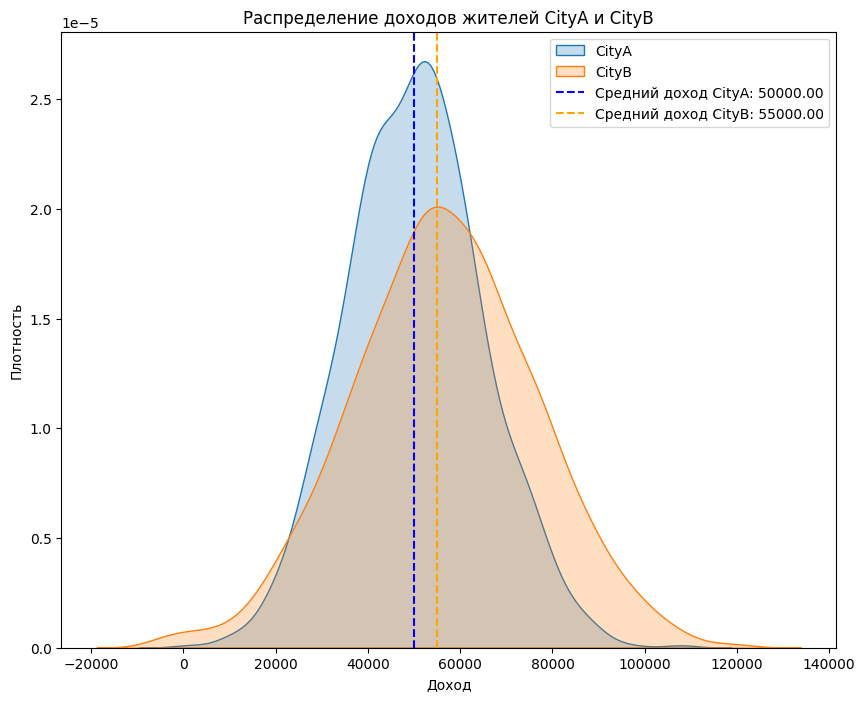

In [57]:
np.random.seed(42)

mean_cityA = 50000
std_dev_cityA = 15000
sample_size = 1000
income_cityA = np.random.normal(loc=mean_cityA, scale=std_dev_cityA, size=sample_size)

mean_cityB = 55000
std_dev_cityB = 20000
income_cityB = np.random.normal(loc=mean_cityB, scale=std_dev_cityB, size=sample_size)

print("Доходы жителей CityA (первые 10 значений):")
print(income_cityA[:10])
print("\nДоходы жителей CityB (первые 10 значений):")
print(income_cityB[:10])

plt.figure(figsize=(10, 8))
sns.kdeplot(income_cityA, fill=True, label='CityA')
sns.kdeplot(income_cityB, fill=True, label='CityB')
plt.axvline(mean_cityA, color='blue', linestyle='--', label=f'Средний доход CityA: {mean_cityA:.2f}')
plt.axvline(mean_cityB, color='orange', linestyle='--', label=f'Средний доход CityB: {mean_cityB:.2f}')
plt.title('Распределение доходов жителей CityA и CityB')
plt.xlabel('Доход')
plt.ylabel('Плотность')
plt.legend()
plt.show()

## Задача 4

Изучить распределение времени, необходимого для обслуживания клиентов в кафе, и проверить это распределение на "нормальность".

1. Сгенерируйте генеральную совокупность времени обслуживания клиентов, используя экспоненциальное распределение с параметром scale=10 и размером 1000 с помощью np.random.exponential.
2. Из этой генеральной совокупности извлеките случайную выборку из 100 значений без замены.
3. Визуализируйте распределение выборки с помощью sns.kdeplot и plt.hist, настроив параметры для корректного отображения гистограммы.
4. Используйте Q-Q plot (sm.qqplot) для проверки выборки на "нормальность", используя line='r' для сравнения с нормальным распределением.

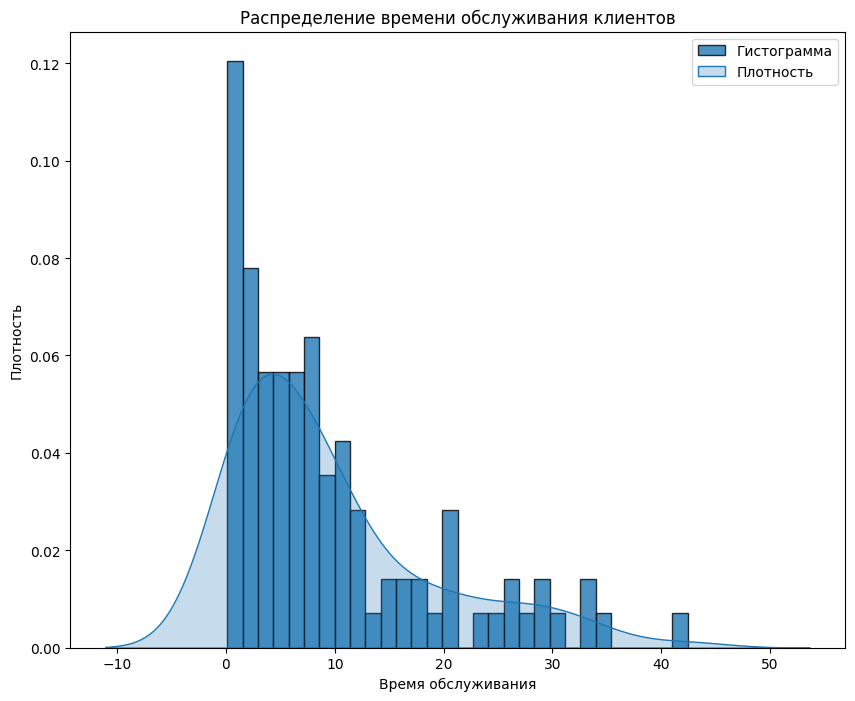

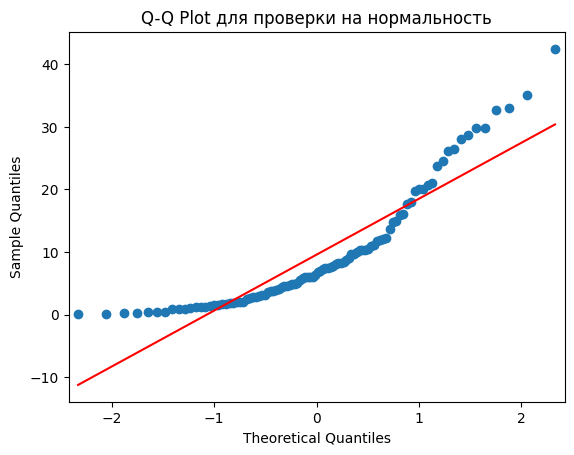

In [69]:
np.random.seed(42)

scale = 10
sample_size = 1000
service_times = np.random.exponential(scale=scale, size=sample_size)

sample_size = 100
random_sample = np.random.choice(service_times, size=sample_size, replace=False)

plt.figure(figsize=(10, 8))
plt.hist(random_sample, bins=30, edgecolor='black', alpha=0.8, density=True, label='Гистограмма')
sns.kdeplot(random_sample, fill=True, label='Плотность')
plt.title('Распределение времени обслуживания клиентов')
plt.xlabel('Время обслуживания')
plt.ylabel('Плотность')
plt.legend()
plt.show()

sm.qqplot(random_sample, line='r')
plt.title('Q-Q Plot для проверки на нормальность')
plt.show()